### To find matches of mentions of Coop Bank aspects in the tweets:
1. The mobile banking app
2. Mcoop cash services or USSD services
3. Customer services
4. Internet banking services

In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Data=pd.read_csv('coop2.csv')
clean_tweets=[]
for tweet in Data.text:
    tweet=re.sub("@[A-Za-z0-9]+", repl=' ',string=tweet)#removes @username/mentions
    tweet=re.sub('[^a-zA-Z]', repl=' ',string=tweet)#removes punctuations + special chars
    tweet=re.sub('(?:(https|http)\s?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)* ',repl=' ',string=tweet)#removes links
    clean_tweets.append(tweet)
    
Data['text']=pd.Series(clean_tweets)

In [8]:
#A df to keep count of the number of tweets about each aspect
all_aspects=pd.DataFrame(columns=['App','Mcoop','Customer_service','Internet_banking'])

In [9]:
import re
#to find positive matches of 'app'
def app_mentions(tweet):
    match=re.search(r'\b app \b',tweet,re.IGNORECASE) or  re.search(r'\b App \b',tweet)  or re.search(r'\b APP \b',tweet)
    if match:
        return True
    else:
        return False

#to find positive matches of 'mcoop' and 'ussd' 
def mcoop_mentions(tweet):
    #to find positive matches of 'app'
    match=re.search(r'\b mcoop \b',tweet,re.IGNORECASE) or re.search(r'\b USSD \b',tweet) or re.search(r'\b Mcoop \b',tweet)
    if match:
        return True
    else:
        return False

#to find positive matches of 'service'
def service_mentions(tweet):
    #to find positive matches of 'app'
    match=re.search(r'\b service \b',tweet,re.IGNORECASE) or re.search(r'\b services \b',tweet)
    if match:
        return True
    else:
        return False

#to find positive matches of 'Internet banking'
def InternetBanking_mentions(tweet):
    #to find positive matches of 'app'
    match=re.search(r'\b internet \b',tweet,re.IGNORECASE) or re.search(r'\b internet banking \b',tweet) or re.search(r'\b online banking \b',tweet)
    if match:
        return True
    else:
        return False
    

App=[]
Mcoop=[]
Customer_service=[]
Internet_banking=[]

All_tweets=[tweet for tweet in Data.text]

for tweet in All_tweets:
    if app_mentions(tweet) ==True:
        tweet=tweet+','
        App.append(tweet)
        
    if mcoop_mentions(tweet)==True:
        tweet=tweet+','
        Mcoop.append(tweet)
    
    if service_mentions(tweet)==True:
        tweet=tweet+','
        Customer_service.append(tweet)
        
    if InternetBanking_mentions(tweet)==True:
        tweet=tweet+','
        Internet_banking.append(tweet)


#To add all positive matches of all aspects to the DF
all_aspects['App']=pd.Series(App)
all_aspects['Mcoop']=pd.Series(Mcoop)
all_aspects['Customer_service']=pd.Series(Customer_service)
all_aspects['Internet_banking']=pd.Series(Internet_banking)


#### To  visualize the results

In [11]:
for col in all_aspects.columns:
    cols=all_aspects.columns

values=[all_aspects['App'].count(),all_aspects['Mcoop'].count() ,all_aspects['Customer_service'].count() ,all_aspects['Internet_banking'].count()]
aspect_count=pd.DataFrame(columns=['Aspect','Count'])
aspect_count.Aspect=cols
aspect_count.Count=values
aspect_count.sort_values(by='Count',ascending=True,inplace=True)

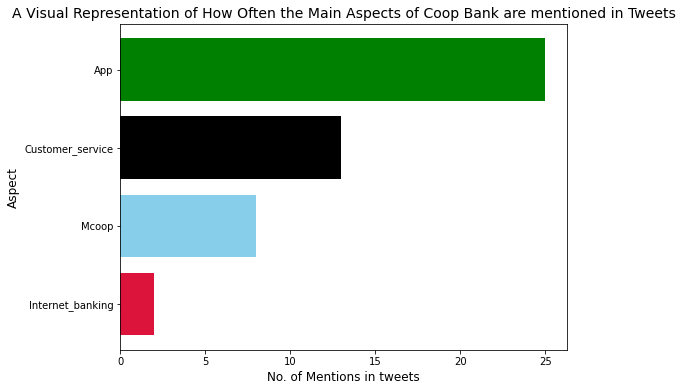

In [14]:
plt.figure(figsize=(8,6))
plt.title('A Visual Representation of How Often the Main Aspects of Coop Bank are mentioned in Tweets',fontsize=14)
plt.xlabel('No. of Mentions in tweets',fontsize=12)
plt.ylabel('Aspect',fontsize=12)
plt.barh(aspect_count.Aspect,aspect_count.Count,color=['crimson','skyblue','black','green'])
plt.show()